In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

# data overview

In [ ]:
main_df = pd.read_csv("data/diamonds.csv")
main_df.info()

In [ ]:
main_df.isna().sum()

In [ ]:
main_df.head()

# data preprocessing

In [ ]:
# drop identifier column "diamond_id"
df = main_df.drop("diamond_id", axis = 1)

## category and object datatype column

### handling color columns of diamond

In [ ]:
# check color category
df["color"].unique()

there is nan value (missing)

In [ ]:
# check data where color is not null for missing values
df[df["color"].notna()].isna().sum()

In [ ]:
# how many row that color column has data. 
len(df[df["color"].notna()])

In [ ]:
# how many row that color is null but dominant colour has a value.
len(df[df["color"].isna() & df.fancy_color_dominant_color.notna()])

we will see many rows : if color is nan then fancy color column has a value in it.<br>
210542 + 9162 =  219704(size of dataset)

In [ ]:
# observe where color is nan
df[df["color"].isna()]

In [ ]:
# look inside data where colour is null
df[df["color"].isna()].isna().sum()

because we know that color in columns 
- color
- fancy_color_dominant_color
- fancy_color_secondary_color
- fancy_color_overtone
- fancy_color_intensity
<br>is the separate type of color which is the same feature type, so we are going to merge them to one column. 

In [ ]:
df["fancy_color_dominant_color"].fillna("X" ,inplace=True)
df["fancy_color_secondary_color"].fillna("X" ,inplace=True)
df["fancy_color_overtone"].fillna("X" ,inplace=True)
df["fancy_color_intensity"].fillna("X" ,inplace=True)
df["color"].fillna("X" ,inplace=True)
df

In [ ]:
col1 = df['fancy_color_dominant_color']
col2 = df['fancy_color_secondary_color']
col3 = df['fancy_color_overtone']
col4 = df['fancy_color_intensity']
col5 = df['color']
df.loc[:, ['color_type']] = df['color'].str.cat([col1, col2, col3, col4, col5], sep ="_")
df

Then drop all color columns that just merge into color_type

In [ ]:
df.drop(['color','fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity'], axis = 1, inplace=True)

color columns are categorical value.
we'll start imputing and encoding later on this notebook

### handling missing cut
we will try to fill missing "cut" value using existed data on symmetry and polish column<br>  

In [ ]:
df

In [ ]:
# find how many row that cut are nan
df["cut"].isna().sum()

In [ ]:
df["cut"].value_counts()

In [ ]:
#plot for bar graph
df["cut"].value_counts().plot(kind="bar")

the large number of diamonds is classified as "excellent" cutting grade.

In [ ]:
# count how many cut grade on specific symmetry and polish grade
pd.DataFrame(df[["cut","symmetry","polish"]].value_counts())

In [ ]:
# count how many nan value of cut column has specific symmetry and polish
pd.DataFrame(df[df["cut"].isna()][["symmetry","polish"]].value_counts())

In [ ]:
# let's fill cut value
# fill "Excellent" if symmetry or polish is/are excellent
df["cut"] = np.where(df["cut"].isna() & ((df["symmetry"] == "Excellent") | (df["polish"] == "Excellent")),
                     "Excellent", df["cut"])

# fill "Very Good" if symmetry and polish are very good
df["cut"] = np.where(df["cut"].isna() & ((df["symmetry"] == "Very Good") & (df["polish"] == "Very Good")),
                     "Very Good", df["cut"])

# otherwise, fill "Good"
df['cut'] = np.where(df["cut"].isna(), "Good", df['cut'])

In [ ]:
df["cut"].value_counts()

In [ ]:
df["cut"].isna().sum()

### handling girdle_min, girdle_max, and culet_size

In [ ]:
df.isna().sum()

In [ ]:

# plot girdle_min bar graph
df["girdle_min"].value_counts().plot(kind = "bar")

In [ ]:
# plot girdle_max bar graph
df["girdle_max"].value_counts().plot(kind = "bar")

In [ ]:
# how large of dataset
len(df)

In [ ]:
# count how many diamonds got lack of both girdle_min, girdle_max data 
len(df[df["girdle_min"].isna() & df["girdle_max"].isna()])

almost of girdle_min missing occured with girdle_max missing

In [ ]:
# count how many diamonds got lack of girdle_min, girdle_max data, and culet_size
len(df[df["girdle_min"].isna() & df["girdle_max"].isna() & df["culet_size"].isna()])

can't summary that missed of gardle detail affected to culet

In [ ]:
# count how many diamonds got lack of both girdle_min, girdle_max data 
len(df[df["girdle_min"].isna() & df["girdle_max"].isna()]) / len(df)

let's drop it because we can't properly impute these two variable.<br>
the missing values are 38% of dataset. To imputing girdle_min, we should know<br>
girdle max for upper-bound girdle size.<br>

So, we have 2 ways to manipulate girdle_min and girdle_max :
(1) drop columns - no effect amount of row, learning is less complex.<br>
(2) drop rows which have nan - remove 38% of dataset, but price is probably founded<br>
correlate to girdle later.

we choose (1). Let's drop them

In [ ]:
df.drop(["girdle_max","girdle_min"], axis=1, inplace = True)

For culet size serching, we found that culet size can be None(N) for <br>
very small size of culet. 

information source : https://www.brilliance.com/education/diamonds/culet

In [ ]:
df["culet_size"].value_counts()

from `value_count()`, we see N(None) is the most frequent culet_size.<br>
So, It's a great idea to impute null value in "culet" column to N.

In [ ]:
df['culet_size'] = np.where(df['culet_size'].isna(), "N", df['culet_size'])

In [ ]:
df.isna().sum()

### drop columns that have greater than 50% missing value

In [ ]:
def missrate(df, *cols):
    for col in cols:
        print(f"{col}'s missing ratio : {(len(df[df[col].isna()])/len(df))*100:.2f} %")

missrate(df, "culet_condition", "fluor_color", "eye_clean", "fluor_intensity")

In [ ]:
df.drop(["culet_condition", "fluor_color", "eye_clean", "fluor_intensity"], axis =1, inplace= True)

In [ ]:
df.isna().sum()

### handling date

In [ ]:
df["date"].unique()

date column has only one value, let's drop date column

In [ ]:
df.drop("date", axis =1, inplace= True)

## numerical-value column

In [ ]:
df

In [ ]:
df.info()

### the zeroes values in meas' shape columns
the width/depth/length of diamonds can't be zeros,<br>
drop rows which three features are 0. 

In [ ]:
# count how many zero values row
len(df[( (df["meas_length"]==0) | (df["meas_width"]==0) | (df["meas_depth"]==0) )])

In [ ]:
index = df[( (df["meas_length"]==0) | (df["meas_width"]==0) | (df["meas_depth"]==0) )].index
df.drop(index , inplace=True)

In [ ]:
len(df[( (df["meas_length"]==0) | (df["meas_width"]==0) | (df["meas_depth"]==0) )])

### derived column
in this dataset, depth_percent is approximately calculated by (200\*z)/(x+y).<br>
we could regress before we train our model.

In [ ]:
# prove equation
temp = df.loc[:, ["meas_length","meas_width","meas_depth","depth_percent"]]
temp.loc[:, ["depth_r"]] = np.zeros(len(temp))

In [ ]:
temp.loc[:, ["depth_r"]] = np.where(df["depth_percent"].notna(), (200*df["meas_depth"])/(df["meas_length"]+df["meas_width"]), temp["depth_r"])

In [ ]:
temp

depth_r and depth_percent are similar.

In [ ]:
df.drop("depth_percent", axis =1, inplace= True)

In [ ]:
df

### abnormally data point detection

In [ ]:
# plot pair plot for abnormaly detection
sns.pairplot(df)

![pairplot abnormal](public/pairplot_abnormal.png)

you'll see abnormally data point on meas' shape graph. <br>
(1) dataset may contain two groups of population, from the clusters <br>
that we see in the meas_depth and table_percent graph.<br>
(2) In meas_length and meas_width, there are possibly errors.<br>

let's look inside how many of them by giving<br>
(1) meas_length > 50<br>
(2) meas_width >35

In [ ]:
df[ (df["meas_length"] >50) | (df["meas_width"] > 35) ]

In [ ]:
# drop it
index = df[ (df["meas_length"] >50) | (df["meas_width"] > 35) ].index
df.drop(index , inplace=True)

In [ ]:
sns.pairplot(df)

![paiplot normal](public/pairplot_after.png)

## turn categorical value to numerical value 

In [ ]:
df.info()

In [ ]:
# unique category of columns (ordinary)
dict_unique = {
                "cut" : np.unique(df.cut),
               "color_type" : np.unique(df.color_type),
               "clarity" : np.unique(df.clarity),
               "symmetry" : np.unique(df.symmetry),
               "polish" : np.unique(df.polish),
               "culet_size" : np.unique(df.culet_size)}

uniq_df = pd.DataFrame.from_dict(dict_unique, orient='index')
uniq_df.T

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['color_type']= label_encoder.fit_transform(df['color_type'])
  
df['color_type'].unique()

In [ ]:
# from column dictionary, categories tell how good quality/criteria/level
# of diamond in specific measurement (worst-best)

cutp = {"None" : 1, "Fair" : 2 , "Good" : 3 , "Very Good" : 4 , "Excellent" : 5 , "Ideal" : 6}
clarityp = {"I3" : 1, "I2" : 2, "I1" : 3, "SI2" : 4 , "SI1" : 5, "VS2" : 6, "VS1" : 7, "VVS2" : 8, "VVS1" : 9, "IF" : 10 }
symmetryp = {"Poor" : 1 , "Fair" : 2 , "Good" : 3 , "Very Good" : 4 , "Excellent" : 5}
polishp = {"Poor" : 1 , "Fair" : 2 , "Good" : 3 , "Very Good" : 4 , "Excellent" : 5}
culet_sizep = { "EL" : 1, "VL" : 2, "L" : 3, "SL" : 4, "M" : 5,"S" : 6, "VS" : 7, "N" : 8}
# fluor_intensityp = {"Very Strong" : 1, "Strong" : 2, "Medium" : 3, "Slight" : 4 ,"Very Slight" : 5, "Faint" : 6 , "None" : 7}

def fillp(dataframe ,col ,dictp):
    dataframe.loc[:,[col]] = dataframe.loc[:,[col]].replace(dictp)

fillp(df, "cut", cutp)
fillp(df, "clarity", clarityp)
fillp(df, "symmetry", symmetryp)
fillp(df, "polish", polishp)
fillp(df, "culet_size", culet_sizep)

In [ ]:
df.info()

In [ ]:
df

In [ ]:
# using one-hot encoding with get_dummies for lab column

dummies = pd.get_dummies(df['lab'])
df_f = pd.concat([df, dummies], axis = 1).drop("lab", axis = 1)
df_f

## basic analysis about price of diamond and fancy color features

In [ ]:

# plot graph of fancy color diamonds
main_df["fancy_color_dominant_color"].value_counts().plot(kind = "bar")

From researching and experiment with this dataset, <br>
the price of diamonds increased when they have fancy color and rarity. 

In [ ]:
main_df[main_df["color"].isna()].total_sales_price.mean()

In [ ]:

main_df[main_df["color"].notna()].total_sales_price.mean()

In [ ]:
pd.pivot_table(main_df[main_df["fancy_color_dominant_color"].notna()],
               values="total_sales_price", columns="fancy_color_dominant_color",
               aggfunc = np.mean).T.plot()

In [ ]:
# fill null value with last column "fancy_color_intensity"
main_df["fancy_color_intensity"].unique()

In [ ]:
# using one-hot encoding with get_dummies for shape column
dummies = pd.get_dummies(df_f['shape'])
df_f = pd.concat([df_f, dummies], axis = 1).drop("shape", axis = 1)
df_f

In [ ]:
# plot cluster map
sns.clustermap(df_f.corr(), cmap='RdYlBu')

In [ ]:
df_f.corr()

# training model with linear regression

In [ ]:
# import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# create evaluation function
def evaluation_matric(X_test, y_test, model):
    print("Regression metrics on the test set")
    y_preds = model.predict(X_test)  
    r2 = r2_score(y_true = y_test, y_pred = y_preds )
    MAE = mean_absolute_error(y_true = y_test, y_pred = y_preds )
    MSE = mean_squared_error(y_true = y_test, y_pred = y_preds )
    print(f"r2_score : {r2} ")
    print(f"MAE : {MAE} ")
    print(f"MSE : {MSE} ")
    return {"R2" : r2, "MAE" : MAE, "MSE" : MSE}

In [ ]:
# import estimator and spliting module
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# set random seed
np.random.seed(42)

# split features and target
X_lr = df_f.drop(["total_sales_price"], axis = 1)
y_lr = df_f["total_sales_price"]

# split dataset to training set and test set
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size = 0.2)

# fit the model
lr_rgs_A = LinearRegression()
lr_rgs_A.fit(X_lr_train, y_lr_train)

In [ ]:
evaluation_matric(X_test=X_lr_test, y_test=y_lr_test, model= lr_rgs_A)

In [ ]:
# show difference between prediction and actual value
cmp_lr = pd.DataFrame()
y_lr_preds = lr_rgs_A.predict(X_lr_test)
cmp_lr.insert(0, 'y_preds', y_lr_preds)
y_test_lr = y_lr_test.reset_index()
cmp_lr.insert(1, 'y_test', y_test_lr.loc[:, ["total_sales_price"]])
cmp_lr.loc[:, ['diff']] = cmp_lr["y_preds"] - cmp_lr["y_test"]
cmp_lr

# training model with sklearn regression

In [ ]:
# import estimator 
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_rf = df_f.drop(["total_sales_price"], axis = 1)
y_rf = df_f["total_sales_price"]

np.random.seed(42)

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size = 0.2)

rf_rgs1 = RandomForestRegressor()
rf_rgs1.fit(X_rf_train, y_rf_train)

In [ ]:
evaluation_matric(X_test=X_rf_test, y_test=y_rf_test, model= rf_rgs1)

In [ ]:
# show difference between prediction and actual value
cmp_rf = pd.DataFrame()
y_rf_preds = rf_rgs1.predict(X_rf_test)
cmp_rf.insert(0, 'y_preds', y_rf_preds)
y_test_rf = y_rf_test.reset_index()
cmp_rf.insert(1, 'y_test', y_test_rf.loc[:, ["total_sales_price"]])
cmp_rf.loc[:, ['diff']] = cmp_rf["y_preds"] - cmp_rf["y_test"]
cmp_rf

In [ ]:
# get all current parameters
rf_rgs1.get_params()

## Hyperparameter tuning with RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)

# the interval/set of value that will be assigned to model training
grids = {"n_estimators" : [10,100,200,500,1000],
        "max_depth" : [None, 5, 10, 20, 30],
       "max_features" : [1, None,"sqrt"],
       "min_samples_split" : [2,4,6],
       "min_samples_leaf" : [1,2,4]}

# use every unit for processing
rf = RandomForestRegressor(n_jobs = -1)

# start model fittings
rf_rgs2 = RandomizedSearchCV(estimator = rf,
                           param_distributions = grids,
                           n_iter = 20, 
                           cv = 5,
                           verbose = 2 )
rf_rgs2.fit(X_rf_train, y_rf_train)

In [ ]:
# get best parameters
rf_rgs2.best_params_

In [ ]:
evaluation_matric(X_test=X_rf_test, y_test=y_rf_test, model= rf_rgs2)

In [ ]:
# show difference between prediction and actual value
cmp_rf = pd.DataFrame()
y_rf_preds = rf_rgs2.predict(X_rf_test)
cmp_rf.insert(0, 'y_preds', y_rf_preds)
y_test_rf = y_rf_test.reset_index()
cmp_rf.insert(1, 'y_test', y_test_rf.loc[:, ["total_sales_price"]])
cmp_rf.loc[:, ['diff']] = cmp_rf["y_preds"] - cmp_rf["y_test"]
cmp_rf

In [ ]:
cmp_rf.describe()

# Score summary plot

In [ ]:
# create score comparison table
lr_metrics = evaluation_matric(X_test=X_lr_test, y_test=y_lr_test, model= lr_rgs_A)
rf1_metrics = evaluation_matric(X_test=X_rf_test, y_test=y_rf_test, model= rf_rgs1)
rf2_metrics = evaluation_matric(X_test=X_rf_test, y_test=y_rf_test, model= rf_rgs2)

compare_metrics = pd.DataFrame({
    "LinearRegression" : lr_metrics,
    "RandomForestRegressor" : rf1_metrics,
    "RandomForestRegressor (tuned)" : rf2_metrics
})

compare_metrics

In [85]:
compare_metrics = compare_metrics.T

[Text(0, 0.5, 'MSE')]

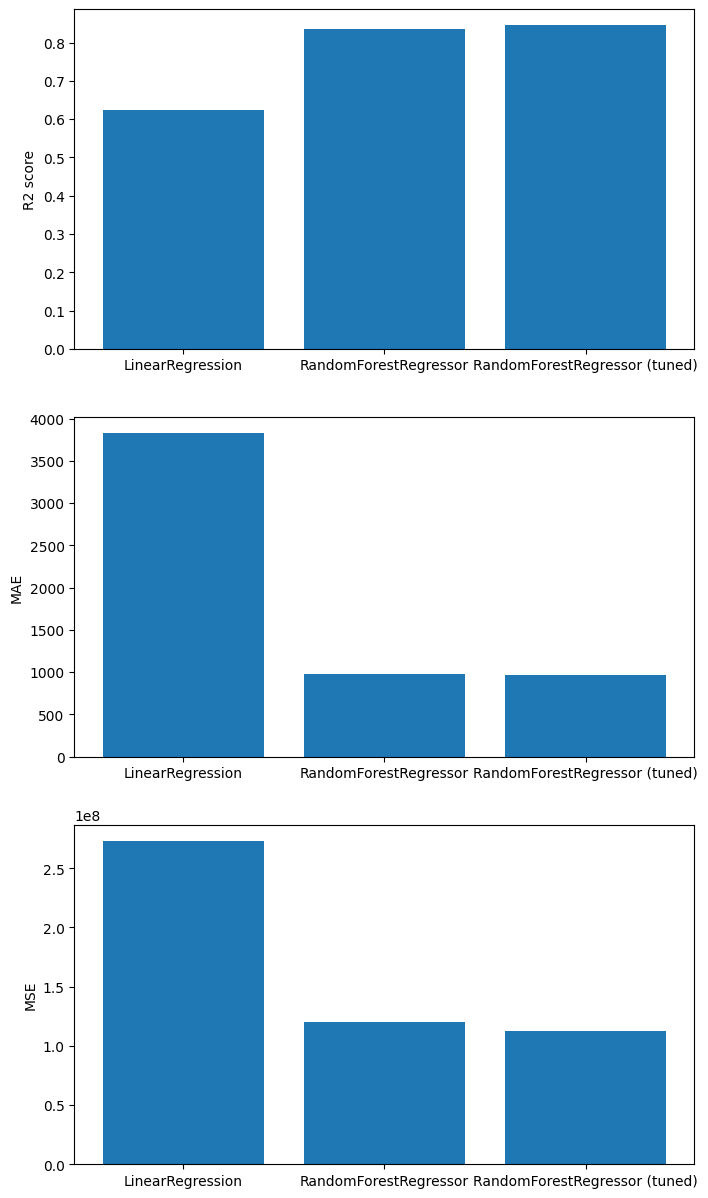

In [86]:
# plot score comparision
fig, (ax0, ax1, ax2) = plt.subplots(nrows = 3, ncols = 1, figsize = (8,15))

ax0.bar(compare_metrics.index,compare_metrics["R2"])
ax0.set(ylabel = "R2 score")

ax1.bar(compare_metrics.index,compare_metrics["MAE"])
ax1.set(ylabel = "MAE")

ax2.bar(compare_metrics.index,compare_metrics["MSE"])
ax2.set(ylabel = "MSE")

In [87]:
compare_metrics

,R2,MAE,MSE
LinearRegression,0.623292,3828.340353,2.732768e+08
RandomForestRegressor,0.834112,982.599111,1.203407e+08
RandomForestRegressor (tuned),0.844616,960.813229,1.127209e+08


the best estimator for this dataset's regression is RandomForestRegressor with hyperparameter tuning. <br>
It has 0.8438 score (R-square), 973.73 mean absolute error, and 113300651 mean square error.